# Multiple Linear Regression Assignment

## Prediction Of Car Prices

#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing
cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends.Specifically,
they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from
the Chinese market. The company wants to know:

--Which variables are significant in predicting the price of a car
--How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American
market.  


##  Reading and Understanding the Data


In [200]:
# Importing all required packages

import numpy as np
import pandas as pd

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

#Plotting graph
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Test Tain Split
from sklearn.model_selection import train_test_split

#import Scaler 
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm 

#Import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score


In [201]:
#Importing CarPrice_Assignment.csv file

df_car = pd.read_csv("CarPrice_Assignment.csv")

#### Describing DataFrame

In [202]:
#Looking at the head rows
df_car.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [203]:
#Looks at rows and columns
df_car.shape

(205, 26)

In [204]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [205]:
# Looks at some statistical information about dataframe.
df_car.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

### __Visualising Numeric Variables__

Let's make a pairplot of all the numeric variables

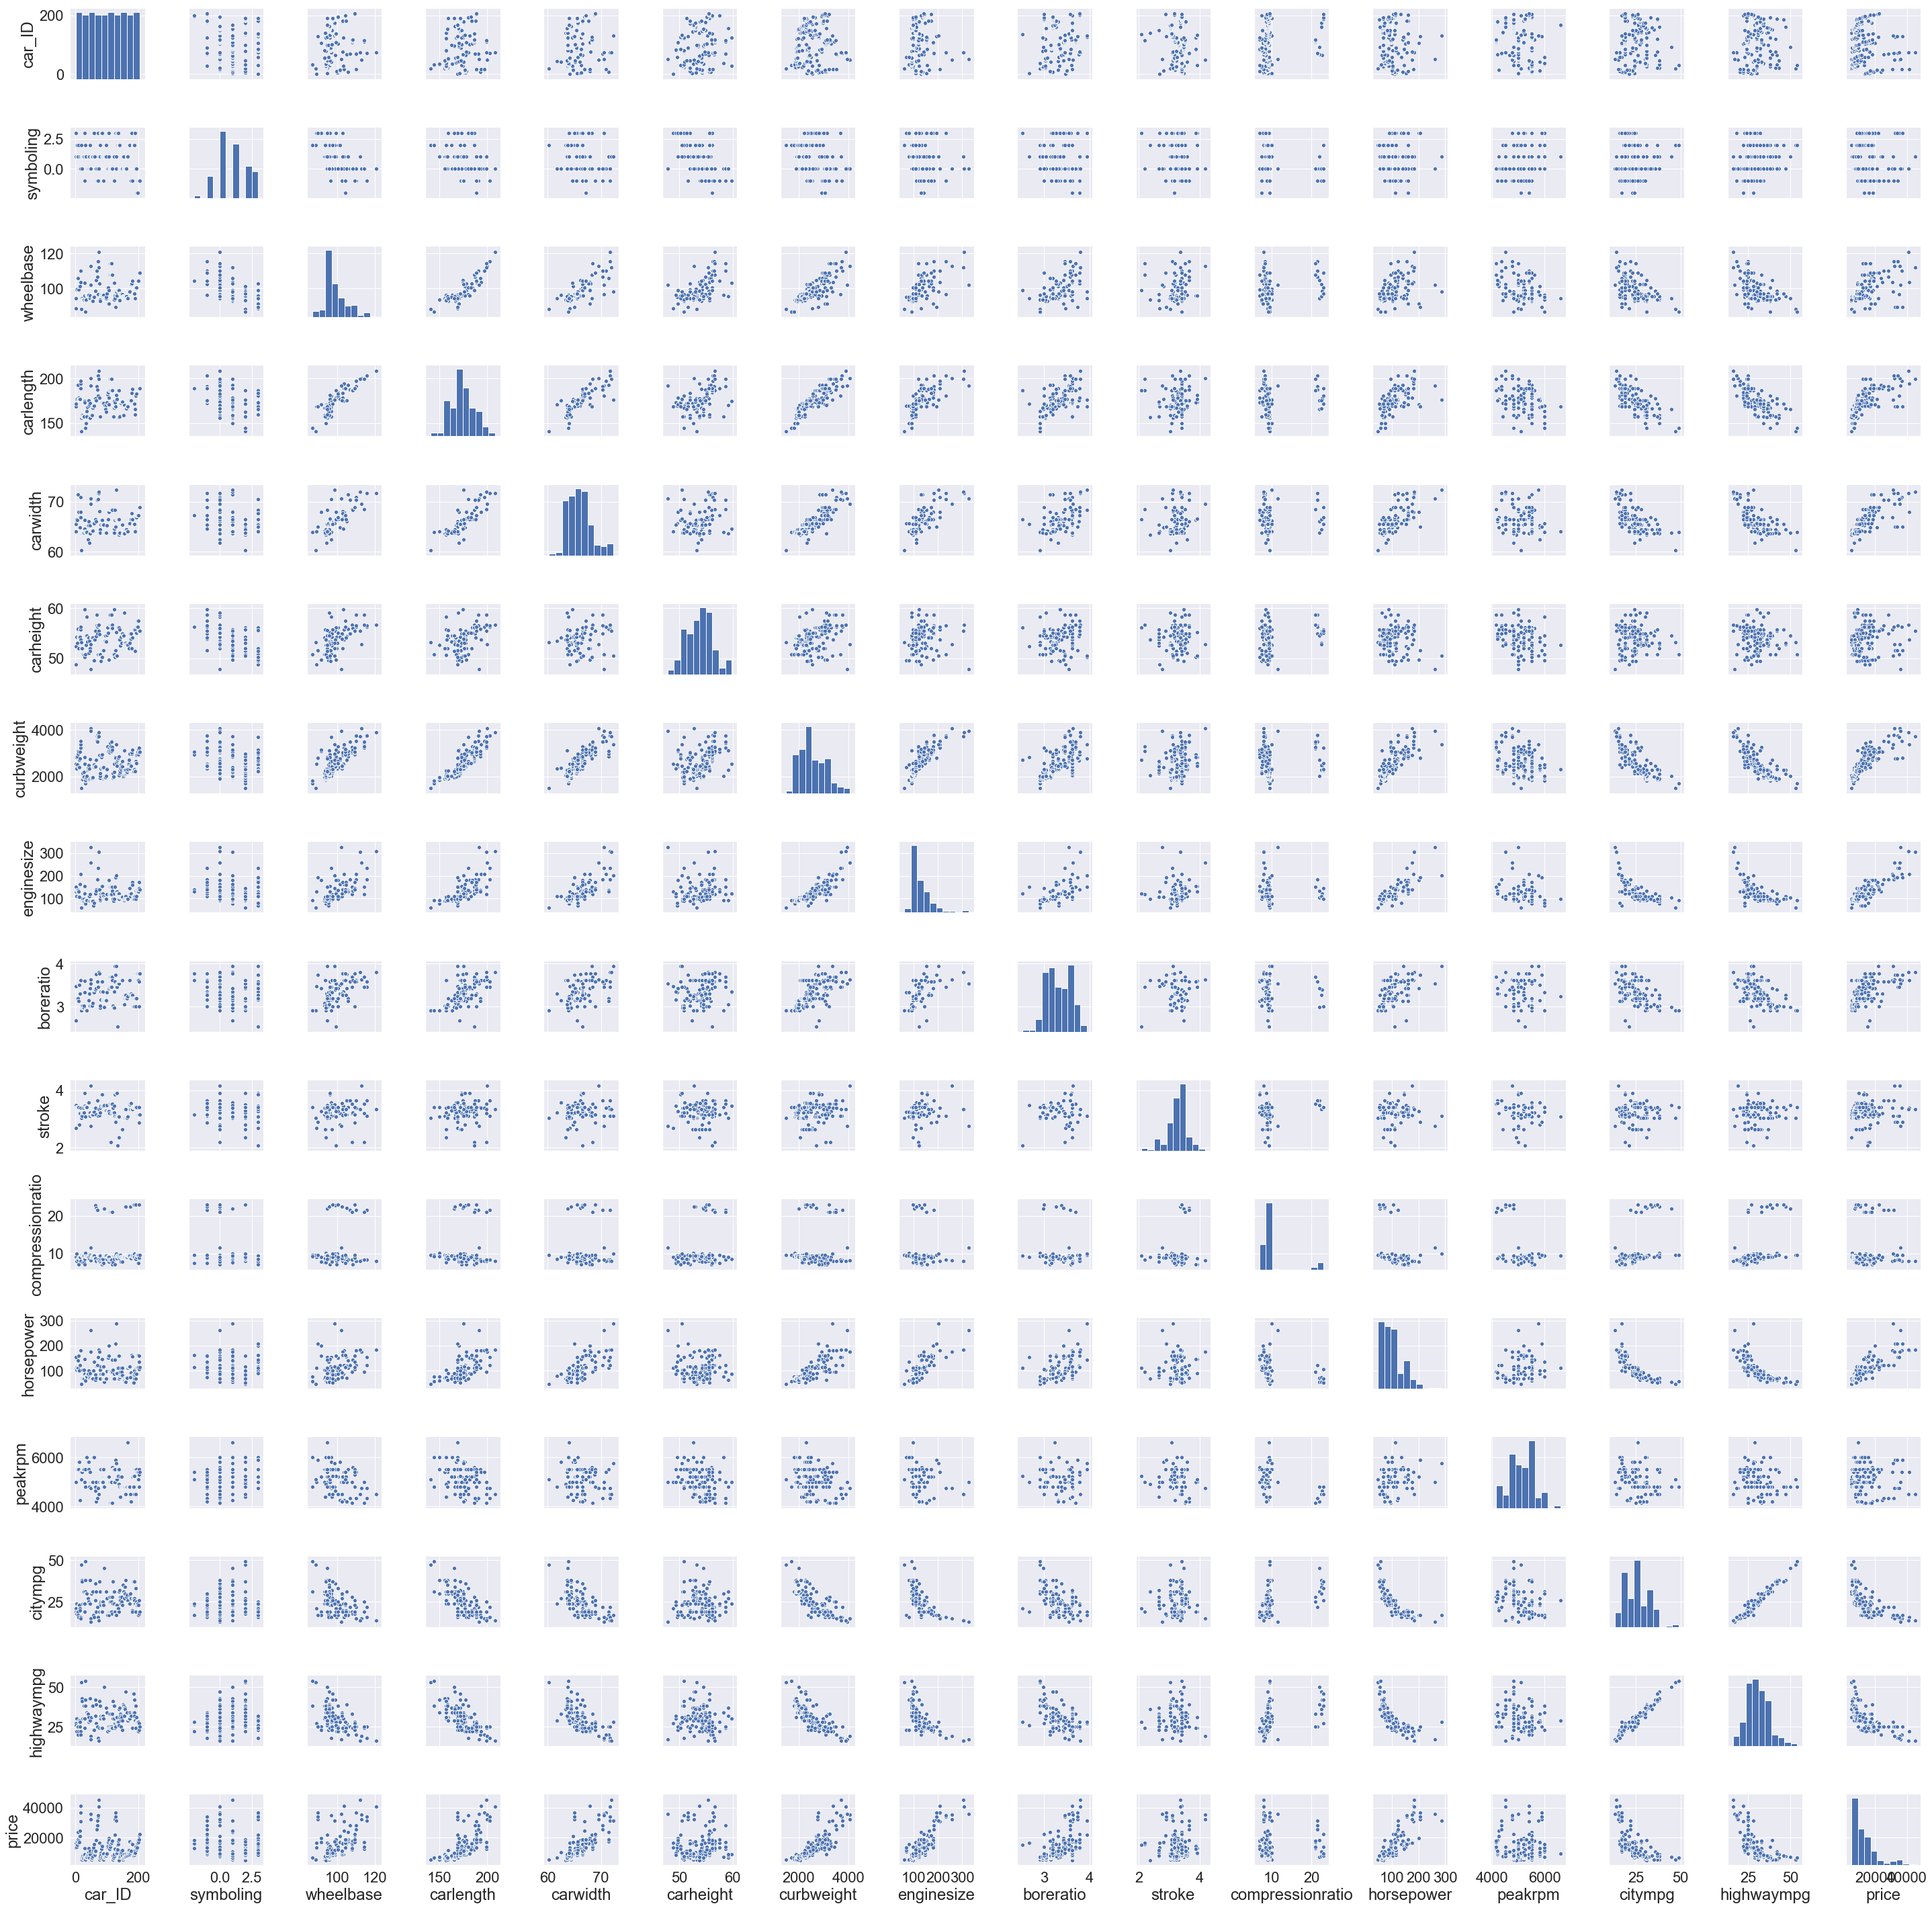

In [206]:
sns.set(font_scale=2)
sns.pairplot(df_car)
plt.show()

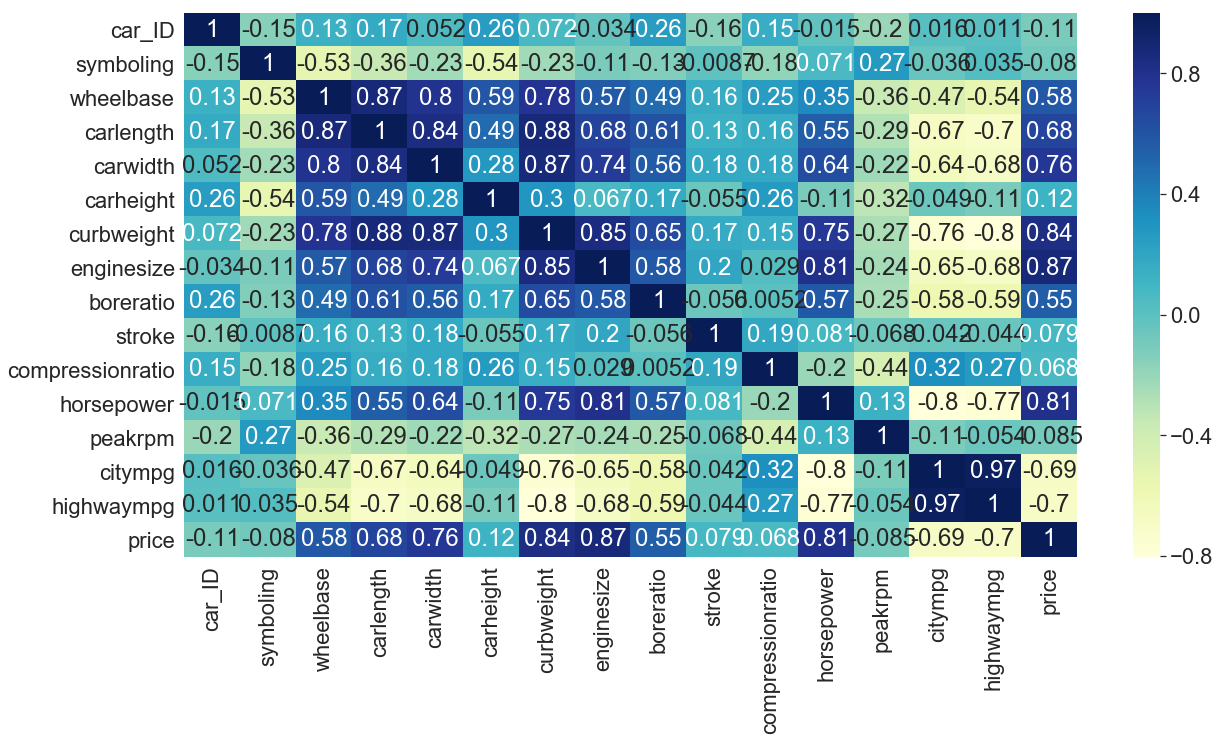

In [207]:
plt.figure(figsize = (20,10))  
sns.heatmap(df_car.corr(),annot = True, cmap="YlGnBu")

#### Visualising Categorical Variables

There are a few categorical variables as well. Let's make a boxplot for some of these variables.

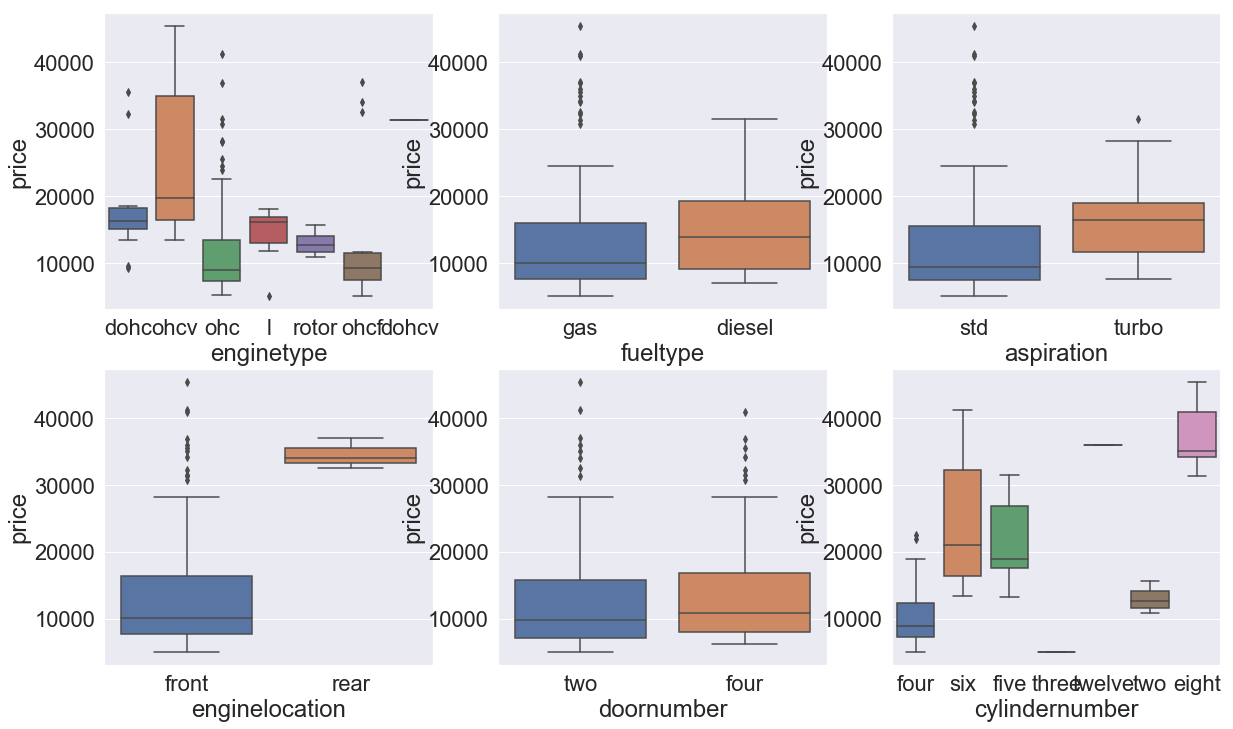

In [208]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'enginetype', y = 'price', data = df_car)
plt.subplot(2,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df_car)
plt.subplot(2,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df_car)
plt.subplot(2,3,4)
sns.boxplot(x = 'enginelocation', y = 'price', data = df_car)
plt.subplot(2,3,5)
sns.boxplot(x = 'doornumber', y = 'price', data = df_car)
plt.subplot(2,3,6)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df_car)

plt.show()

#### Dealing with high correlated data

In [209]:
#From above map we are able to identify the Positive & negitive Correlated variables, as we can notice there is a high positive correlation between price and  enginesize(0.87) ,curbweight(0.84), carwidth(0.76)
#so we can drop carwidth and curbweight from this.
#There is a high negative correlation  between highwaympg and citympg, so lets drop highwaympg

In [210]:
df_car.drop(['carwidth','curbweight','highwaympg'], axis =1, inplace = True)

In [211]:
#we can also remove carID  as its just a serial number 
df_car.drop(['car_ID'], axis =1, inplace = True)

In [212]:
#Now the numeric columns and categorical columns are:
numerical_vars = df_car.dtypes[df_car.dtypes != "object"].index
print("# of Numerical features: ", len(numerical_vars))

categorical_vars = df_car.dtypes[df_car.dtypes == "object"].index
print("# of Categorical features: ", len(categorical_vars))

# of Numerical features:  12
# of Categorical features:  10


### __Data Preparation__

In [213]:
# Check for blank and Missing Values
df_car.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carheight           0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
price               0
dtype: int64

<font color='Blue'>Insight : There is no Null values in this dataset</font>

In [214]:
# Check Number of duplicates
print("Number of Duplicates :", sum(df_car.duplicated()))

Number of Duplicates : 0


#### Checking for Outliers

In [215]:
# Checking for outliers in the continuous variables
# Checking outliers at 25%, 50%, 75%, 85%, 90%, 95% ,98% and 99%

In [216]:
df_car[numerical_vars].describe(percentiles=[.25, .5, .75,.85, .90, .95,.98,.99])

symboling   wheelbase   carlength   carheight  enginesize   boreratio  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   53.724878  126.907317    3.329756   
std      1.245307    6.021776   12.337289    2.443522   41.642693    0.270844   
min     -2.000000   86.600000  141.100000   47.800000   61.000000    2.540000   
25%      0.000000   94.500000  166.300000   52.000000   97.000000    3.150000   
50%      1.000000   97.000000  173.200000   54.100000  120.000000    3.310000   
75%      2.000000  102.400000  183.100000   55.500000  141.000000    3.580000   
85%      2.000000  104.660000  188.200000   56.100000  162.200000    3.620000   
90%      3.000000  107.900000  188.800000   56.620000  181.000000    3.672000   
95%      3.000000  110.000000  196.360000   57.500000  201.200000    3.780000   
98%      3.000000  114.200000  199.568000   59.068000  256.080000    3.780000   
99%      3.000000  115.544000  202.480000   59.100000  302.160000    3.800000   
max      3.000000  120.900000  208.100000   59.800000  326.000000    3.940000   

           stroke  compressionratio  horsepower      peakrpm     citympg  \
count  205.000000        205.000000  205.000000   205.000000  205.000000   
mean     3.255415         10.142537  104.117073  5125.121951   25.219512   
std      0.313597          3.972040   39.544167   476.985643    6.542142   
min      2.070000          7.000000   48.000000  4150.000000   13.000000   
25%      3.110000          8.600000   70.000000  4800.000000   19.000000   
50%      3.290000          9.000000   95.000000  5200.000000   24.000000   
75%      3.410000          9.400000  116.000000  5500.000000   30.000000   
85%      3.500000          9.500000  152.000000  5500.000000   31.000000   
90%      3.540000         10.940000  160.000000  5780.000000   31.600000   
95%      3.640000         21.820000  180.800000  5980.000000   37.000000   
98%      3.896800         22.976000  206.440000  6000.000000   38.000000   
99%      3.900000         23.000000  207.000000  6000.000000   44.720000   
max      4.170000         23.000000  288.000000  6600.000000   49.000000   

              price  
count    205.000000  
mean   13276.710571  
std     7988.852332  
min     5118.000000  
25%     7788.000000  
50%    10295.000000  
75%    16503.000000  
85%    18500.000000  
90%    22563.000000  
95%    32472.400000  
98%    36809.600000  
99%    40802.720000  
max    45400.000000

Text(0, 0.5, 'price')

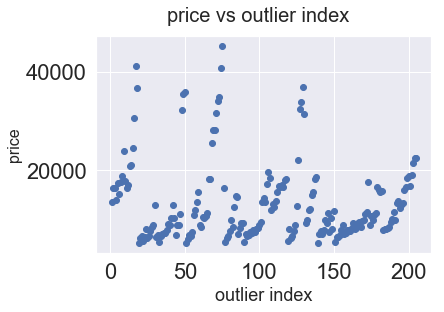

In [217]:
# Plotting price 
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.scatter(c,df_car['price'])
fig.suptitle('price vs outlier index', fontsize=20)              # Plot heading 
plt.xlabel('outlier index', fontsize=18)                          # X-label
plt.ylabel('price', fontsize=16)  

In [218]:
#There is a variable named CarName which is comprised of two parts -
#the first word is the name of 'car company' and the second is the 'car model'.
# We need to consider only company name as the independent variable for model building. 

In [219]:
df_car["CarName"] = df_car['CarName'].astype(str).apply(lambda x: x.replace("-", " "))
df_car["CarName"] = df_car.CarName.map(lambda x: x.split(" ", 1)[0])
df_car["CarName"]

0            alfa
1            alfa
2            alfa
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
          ...    
175        toyota
176        toyota
177        toyota
178        toyota
179        toyota
180        toyota
181       toyouta
182     vokswagen
183    volkswagen
184    volkswagen
185    volkswagen
186    volkswagen
187    volkswagen
188    volkswagen
189            vw
190            vw
191    volkswagen
192    volkswagen
193    volkswagen
194         volvo
195         volvo
196         volvo
197         volvo
198         volvo
199       

In [220]:
#Fix the misspelt CarName with Correct Spelling

df_car["CarName"] = df_car['CarName'].astype(str).apply(lambda x: x.replace("maxda", "mazda"))
df_car["CarName"] = df_car['CarName'].astype(str).apply(lambda x: x.replace("Nissan", "nissan"))
df_car["CarName"] = df_car['CarName'].astype(str).apply(lambda x: x.replace("porcshce", "porsche"))
df_car["CarName"] = df_car['CarName'].astype(str).apply(lambda x: x.replace("toyouta", "toyota"))
df_car["CarName"] = df_car['CarName'].astype(str).apply(lambda x: x.replace("vokswagen", "volkswagen"))
df_car["CarName"] = df_car['CarName'].astype(str).apply(lambda x: x.replace("vw", "volkswagen"))

df_car["CarName"].unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

#### Dealing Categorical variables

In [221]:
#Change the Binary Variables('fueltype', 'aspiration', 'doornumber', 'enginelocation') to 1 and 0

df_car['fueltype']=df_car['fueltype'].map({'gas':1, 'diesel' : 0})
df_car['aspiration'] = df_car['aspiration'].map({'std': 1, 'turbo': 0})
df_car['doornumber'] = df_car['doornumber'].map({'two': 1, 'four': 0})
df_car['enginelocation'] = df_car['enginelocation'].map({'front': 1, 'rear': 0})


In [222]:
# Dummy Variables --Some categorical variable has more than two levels.We need to convert these levels into integer as well. 
# Get the dummy variables for categorical variables like carName, carbody, driveWheel, fuelsystem, cylinderNumber, engineType
#and store it in a new dataframe - 'CarDet'

CarDet = pd.get_dummies(df_car, drop_first = True)
#CarDet = pd.get_dummies(df_car)
CarDet

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  \
0            3         1           1           1               1       88.6   
1            3         1           1           1               1       88.6   
2            1         1           1           1               1       94.5   
3            2         1           1           0               1       99.8   
4            2         1           1           0               1       99.4   
5            2         1           1           1               1       99.8   
6            1         1           1           0               1      105.8   
7            1         1           1           0               1      105.8   
8            1         1           0           0               1      105.8   
9            0         1           0           1               1       99.5   
10           2         1           1           1               1      101.2   
11           0         1           1           0               1      101.2   
12           0         1           1           1               1      101.2   
13           0         1           1           0               1      101.2   
14           1         1           1           0               1      103.5   
15           0         1           1           0               1      103.5   
16           0         1           1           1               1      103.5   
17           0         1           1           0               1      110.0   
18           2         1           1           1               1       88.4   
19           1         1           1           1               1       94.5   
20           0         1           1           0               1       94.5   
21           1         1           1           1               1       93.7   
22           1         1           1           1               1       93.7   
23           1         1           0           1               1       93.7   
24           1         1           1           0               1       93.7   
25           1         1           1           0               1       93.7   
26           1         1           1           0               1       93.7   
27           1         1           0           1               1       93.7   
28          -1         1           1           0               1      103.3   
29           3         1           0           1               1       95.9   
..         ...       ...         ...         ...             ...        ...   
175         -1         1           1           0               1      102.4   
176         -1         1           1           0               1      102.4   
177         -1         1           1           0               1      102.4   
178          3         1           1           1               1      102.9   
179          3         1           1           1               1      102.9   
180         -1         1           1           0               1      104.5   
181         -1         1           1           0               1      104.5   
182          2         0           1           1               1       97.3   
183          2         1           1           1               1       97.3   
184          2         0           1           0               1       97.3   
185          2         1           1           0               1       97.3   
186          2         1           1           0               1       97.3   
187          2         0           0           0               1       97.3   
188          2         1           1           0               1       97.3   
189          3         1           1           1               1       94.5   
190          3         1           1           1               1       94.5   
191          0         1           1           0               1      100.4   
192          0         0           0           0               1      100.4   
193          0         1           1           0       

## __Splitting the Data into Training and Testing Sets__ 

In [223]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_Car_train, df_Car_test = train_test_split(CarDet, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use Standard scaling.

In [224]:
scaler = StandardScaler()

In [225]:
# Apply scaler() to all the numeric columns .
# We alreading retrieved numerical_vars in earlier steps

df_Car_train[numerical_vars] = scaler.fit_transform(df_Car_train[numerical_vars])


In [226]:
df_Car_train.head()

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  \
122   0.170159         1           1           0               1  -0.811836   
125   1.848278         1           1           1               1  -0.677177   
166   0.170159         1           1           1               1  -0.677177   
1     1.848278         1           1           1               1  -1.670284   
199  -1.507960         1           0           0               1   0.972390   

     carlength  carheight  enginesize  boreratio  ...  cylindernumber_three  \
122  -0.487238  -1.134628   -0.660242  -1.297329  ...                     0   
125  -0.359789  -1.382026    0.637806   2.432256  ...                     0   
166  -0.375720  -0.392434   -0.660242  -0.259197  ...                     0   
1    -0.367754  -1.959288    0.123485   0.625138  ...                     0   
199   1.225364   1.627983    0.123485   1.201877  ...                     0   

     cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
122                      0                   0                1   
125                      0                   0                0   
166                      0                   0                0   
1                        0                   0                0   
199                      0                   0                0   

     fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  \
122                0               0               0                0   
125                0               0               0                1   
166                0               0               0                1   
1                  0               0               0                1   
199                0               0               0                1   

     fuelsystem_spdi  fuelsystem_spfi  
122                0                0  
125                0                0  
166                0                0  
1                  0                0  
199                0                0  

[5 rows x 62 columns]

In [227]:
df_Car_train.describe()

symboling    fueltype  aspiration  doornumber  enginelocation  \
count  1.430000e+02  143.000000  143.000000  143.000000      143.000000   
mean   5.473477e-17    0.909091    0.818182    0.440559        0.993007   
std    1.003515e+00    0.288490    0.387050    0.498199        0.083624   
min   -2.347020e+00    0.000000    0.000000    0.000000        0.000000   
25%   -6.689008e-01    1.000000    1.000000    0.000000        1.000000   
50%    1.701590e-01    1.000000    1.000000    0.000000        1.000000   
75%    1.701590e-01    1.000000    1.000000    1.000000        1.000000   
max    1.848278e+00    1.000000    1.000000    1.000000        1.000000   

          wheelbase     carlength     carheight    enginesize     boreratio  \
count  1.430000e+02  1.430000e+02  1.430000e+02  1.430000e+02  1.430000e+02   
mean   1.538785e-15  2.003060e-16  5.450186e-16 -4.308908e-17 -1.059758e-15   
std    1.003515e+00  1.003515e+00  1.003515e+00  1.003515e+00  1.003515e+00   
min   -2.006930e+00 -2.574223e+00 -2.371619e+00 -1.566427e+00 -2.412359e+00   
25%   -6.771770e-01 -6.186702e-01 -7.222984e-01 -6.847340e-01 -9.320600e-01   
50%   -3.405307e-01 -1.128552e-01  6.112865e-02 -3.663447e-01  9.948427e-03   
75%    4.505882e-01  7.076008e-01  7.414732e-01  3.928914e-01  8.942829e-01   
max    2.874442e+00  2.324616e+00  2.287711e+00  4.923816e+00  2.432256e+00   

       ...  cylindernumber_three  cylindernumber_twelve  cylindernumber_two  \
count  ...            143.000000             143.000000          143.000000   
mean   ...              0.006993               0.006993            0.027972   
std    ...              0.083624               0.083624            0.165472   
min    ...              0.000000               0.000000            0.000000   
25%    ...              0.000000               0.000000            0.000000   
50%    ...              0.000000               0.000000            0.000000   
75%    ...              0.000000               0.000000            0.000000   
max    ...              1.000000               1.000000            1.000000   

       fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  \
count       143.000000       143.000000      143.000000           143.0   
mean          0.349650         0.020979        0.090909             0.0   
std           0.478536         0.143818        0.288490             0.0   
min           0.000000         0.000000        0.000000             0.0   
25%           0.000000         0.000000        0.000000             0.0   
50%           0.000000         0.000000        0.000000             0.0   
75%           1.000000         0.000000        0.000000             0.0   
max           1.000000         1.000000        1.000000             0.0   

       fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  
count       143.000000       143.000000            143.0  
mean          0.440559         0.041958              0.0  
std           0.498199         0.201198              0.0  
min           0.000000         0.000000              0.0  
25%           0.000000         0.000000              0.0  
50%           0.000000         0.000000              0.0  
75%           1.000000         0.000000              0.0  
max           1.000000         1.000000              0.0  

[8 rows x 62 columns]

### Dividing into X and Y sets for the model building

In [228]:
y_Car_train = df_Car_train.pop('price')
X_Car_train = df_Car_train

Looking at Correlations

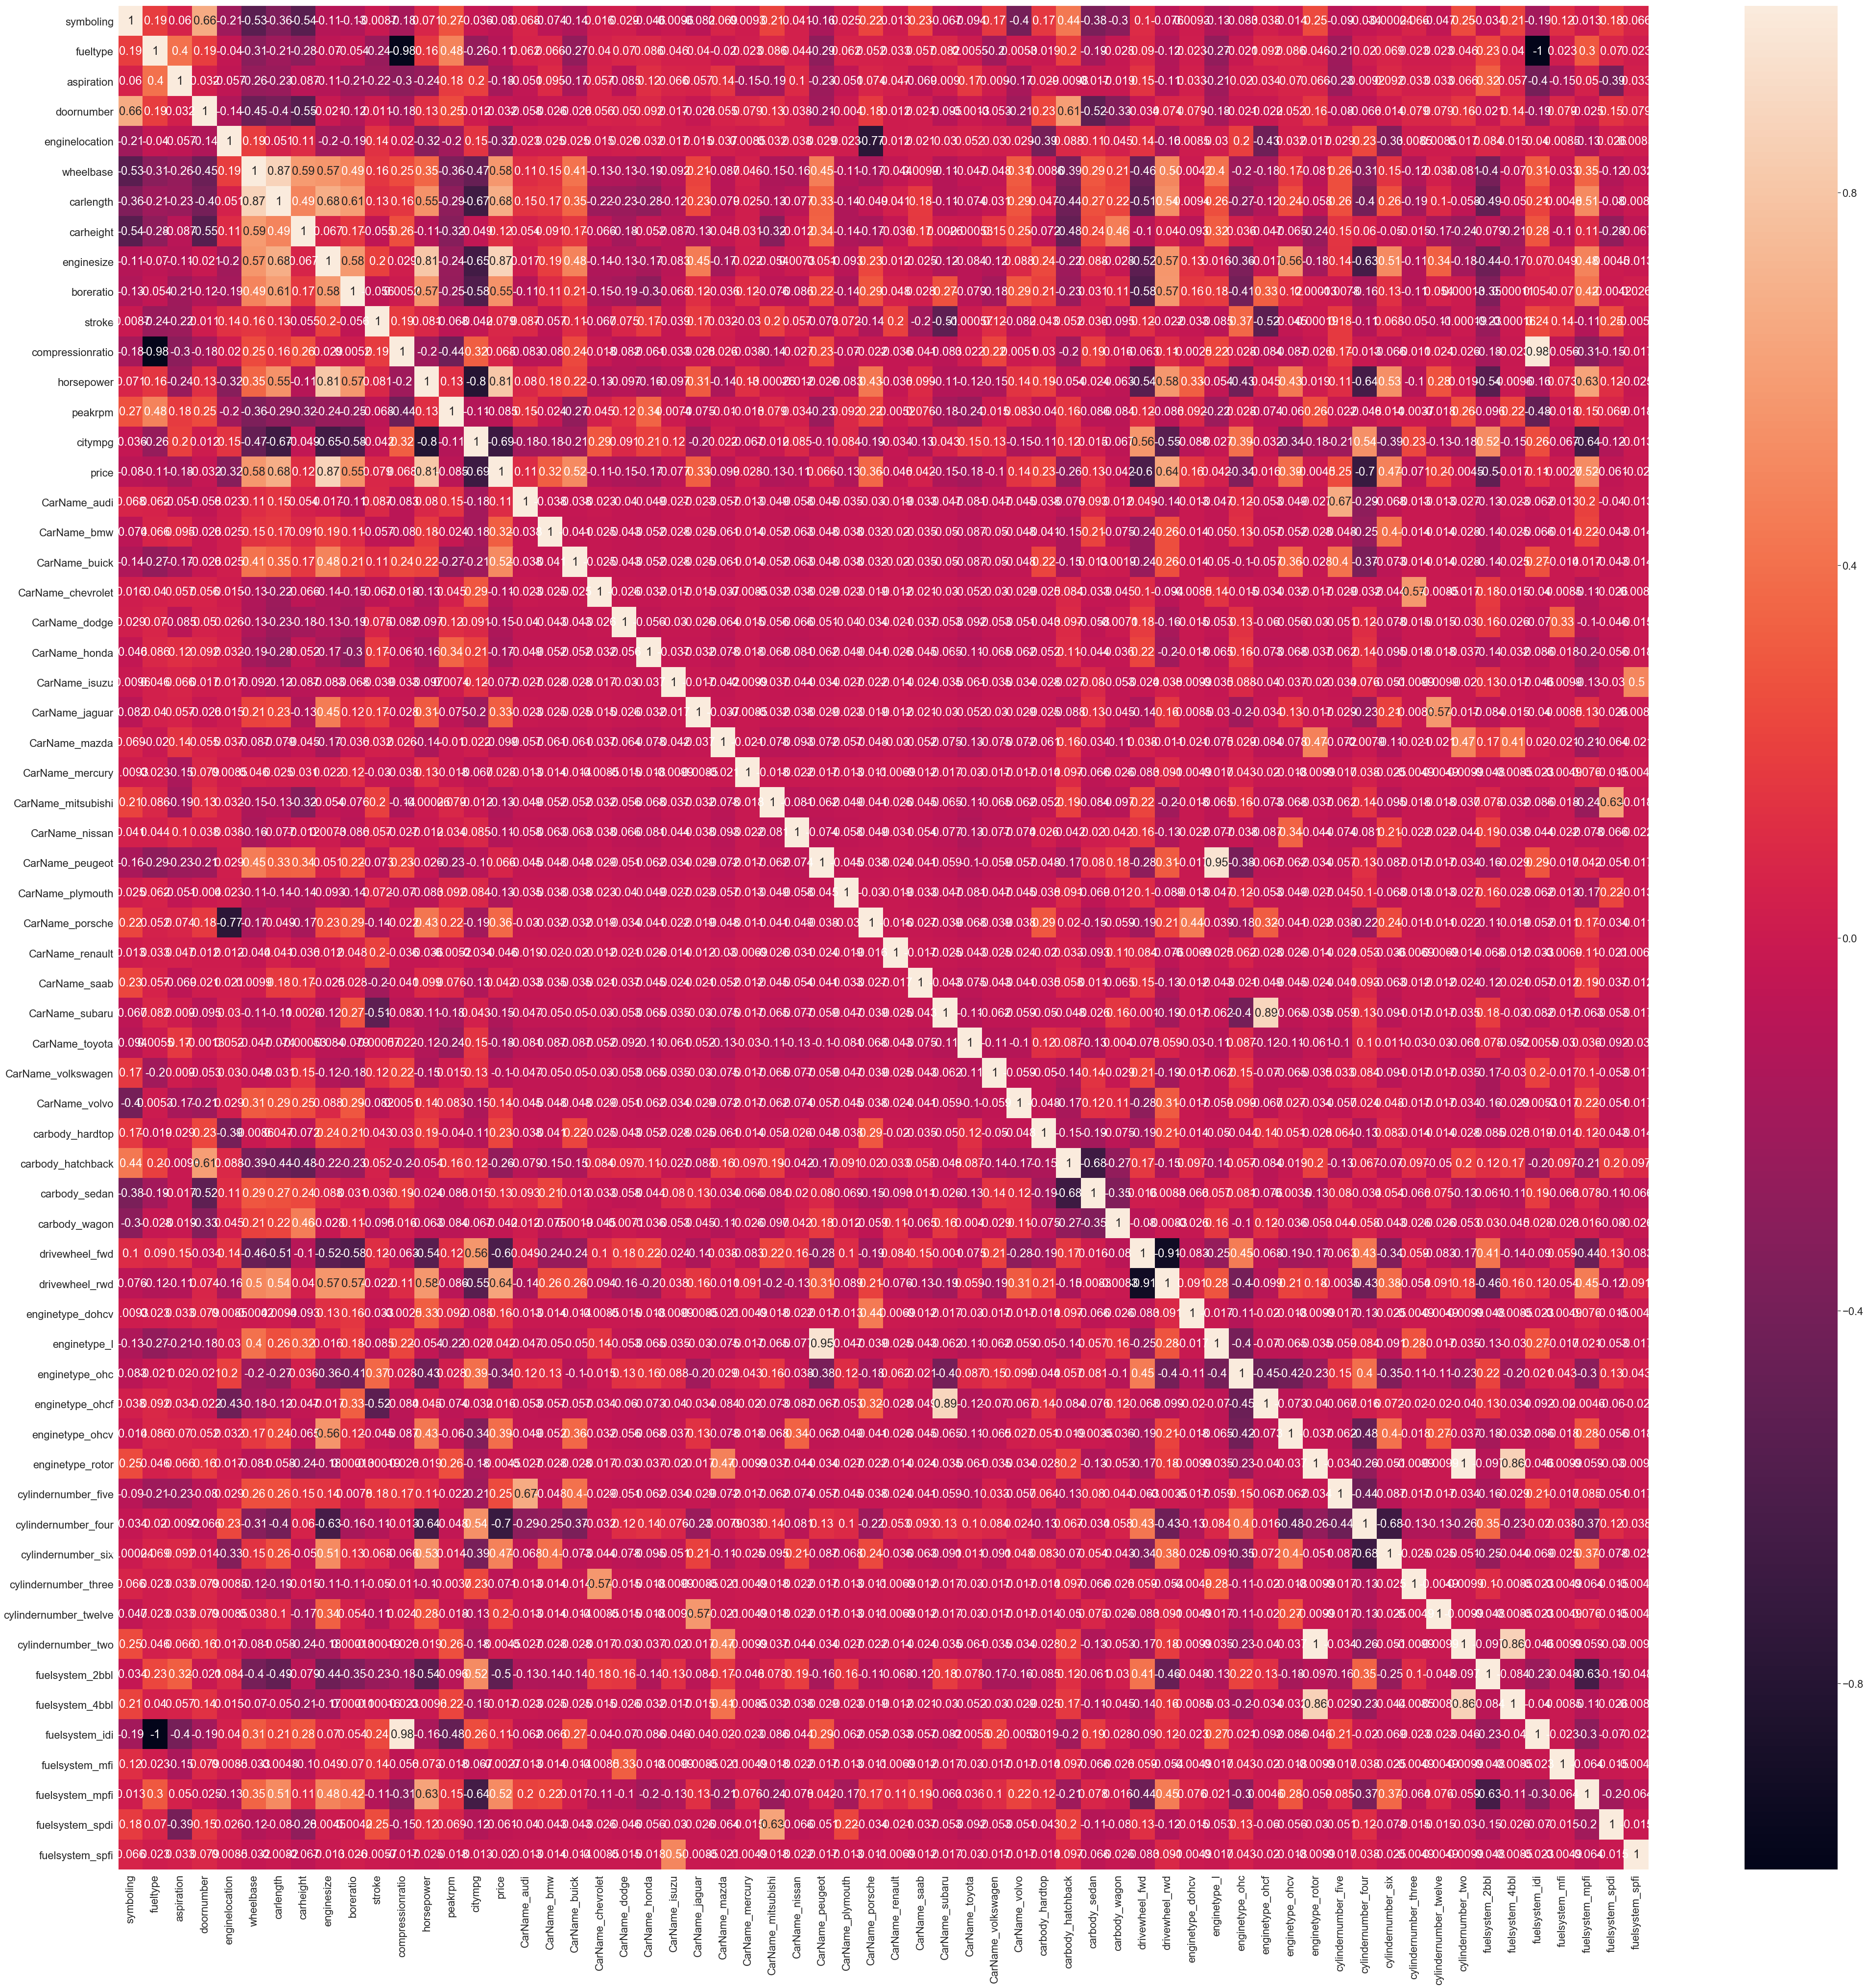

In [229]:
# Let's see the correlation matrix 
plt.figure(figsize = (70,70))        # Size of the figure
sns.heatmap(CarDet.corr(),annot = True)
plt.show()

## Building our model

Using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [230]:
# Running RFE with the output number of the variable equal to 20
Car_lm = LinearRegression()
Car_lm.fit(X_Car_train, y_Car_train)
Car_rfe = RFE(Car_lm, 20)             # running RFE
Car_rfe = Car_rfe.fit(X_Car_train, y_Car_train)


In [231]:
list(zip(X_Car_train.columns,Car_rfe.support_,Car_rfe.ranking_))

[('symboling', False, 39),
 ('fueltype', False, 30),
 ('aspiration', True, 1),
 ('doornumber', False, 21),
 ('enginelocation', True, 1),
 ('wheelbase', False, 7),
 ('carlength', False, 36),
 ('carheight', False, 15),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 10),
 ('compressionratio', False, 32),
 ('horsepower', False, 33),
 ('peakrpm', False, 19),
 ('citympg', False, 29),
 ('CarName_audi', True, 1),
 ('CarName_bmw', True, 1),
 ('CarName_buick', True, 1),
 ('CarName_chevrolet', False, 14),
 ('CarName_dodge', False, 11),
 ('CarName_honda', False, 17),
 ('CarName_isuzu', False, 35),
 ('CarName_jaguar', False, 13),
 ('CarName_mazda', False, 20),
 ('CarName_mercury', False, 37),
 ('CarName_mitsubishi', False, 8),
 ('CarName_nissan', False, 25),
 ('CarName_peugeot', False, 6),
 ('CarName_plymouth', False, 12),
 ('CarName_porsche', True, 1),
 ('CarName_renault', False, 26),
 ('CarName_saab', True, 1),
 ('CarName_subaru', False, 22),
 ('CarName_toyota', False, 23),

In [232]:
#Retrieve RFE support columns and store it in rfe_sup_col
rfe_sup_col = X_Car_train.columns[Car_rfe.support_]
rfe_sup_col

Index(['aspiration', 'enginelocation', 'enginesize', 'boreratio',
       'CarName_audi', 'CarName_bmw', 'CarName_buick', 'CarName_porsche',
       'CarName_saab', 'CarName_volvo', 'carbody_hardtop', 'enginetype_dohcv',
       'enginetype_ohcf', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_spdi'],
      dtype='object')

In [233]:
#Retrieve RFE not support columns and store it in rfe_not_col
rfe_not_col=X_Car_train.columns[~Car_rfe.support_]
rfe_not_col

Index(['symboling', 'fueltype', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'CarName_chevrolet', 'CarName_dodge', 'CarName_honda',
       'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_renault', 'CarName_subaru',
       'CarName_toyota', 'CarName_volkswagen', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcv',
       'cylindernumber_six', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spfi'],
      dtype='object')

In [234]:
# Drop RFE not support column from the carDet Dataframe
CarDet.drop(rfe_not_col, axis =1, inplace = True)

### Building model using statsmodel, for the detailed statistics

In [235]:
# Creating X_train dataframe with RFE selected variables
X_Car_train_rfe = X_Car_train[rfe_sup_col]

In [236]:
# Adding a constant variable 
#import statsmodels.api as sm  
X_Car_train_rfe = sm.add_constant(X_Car_train_rfe)

In [237]:
Car_lm1 = sm.OLS(y_Car_train,X_Car_train_rfe).fit()   # Running the linear model

In [238]:
#Let's see the summary of our linear model
print(Car_lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     85.93
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.36e-61
Time:                        08:00:44   Log-Likelihood:                -12.832
No. Observations:                 143   AIC:                             65.66
Df Residuals:                     123   BIC:                             124.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

In [239]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_Car_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
19     cylindernumber_two     inf
14       enginetype_rotor     inf
0                   const  528.21
3              enginesize   23.61
16    cylindernumber_four   15.15
4               boreratio    8.88
15    cylindernumber_five    6.34
8         CarName_porsche    3.41
5            CarName_audi    3.35
2          enginelocation    2.98
13        enginetype_ohcf    2.95
18  cylindernumber_twelve    2.51
7           CarName_buick    2.42
12       enginetype_dohcv    2.10
17   cylindernumber_three    1.90
1              aspiration    1.61
11        carbody_hardtop    1.53
6             CarName_bmw    1.45
10          CarName_volvo    1.43
20        fuelsystem_spdi    1.41
9            CarName_saab    1.15

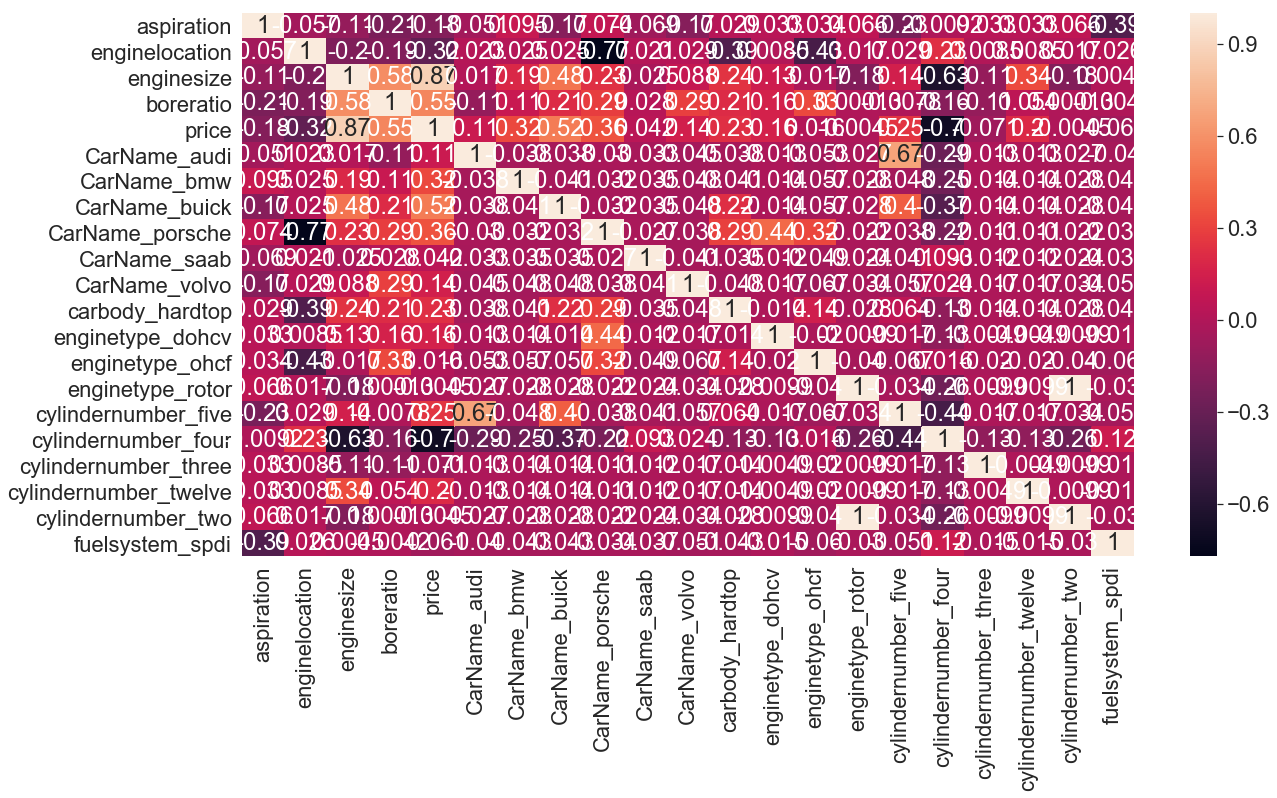

In [240]:
plt.figure(figsize = (20,10))  
sns.heatmap(CarDet.corr(),annot = True)

In [78]:
#R-squared:0.930,Adj. R-squared:0.919

#As we can see from the summary and the VIF dataframe, some variables are still insignificant. 

In [79]:
# From the above VIF and heatmap we can see that enginetype_rotor and cylindernumber_two are highly correlated.so it is insignificant.
# we need to drop any one variable first .now i am dropping enginetype_rotor

In [80]:
#Dropping the variable and updating the model

In [241]:
X_Car_train_rfe = X_Car_train_rfe.drop(["enginetype_rotor"], axis = 1)

In [242]:
#Rebuilding the model without enginetype_rotor

In [243]:
# Adding a constant variable 
X_Car_train_lm = sm.add_constant(X_Car_train_rfe)

In [244]:
Car_lm2 = sm.OLS(y_Car_train,X_Car_train_lm).fit()   # Running the linear model

In [245]:
#Let's see the summary of our linear model
print(Car_lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     85.93
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.36e-61
Time:                        08:00:53   Log-Likelihood:                -12.832
No. Observations:                 143   AIC:                             65.66
Df Residuals:                     123   BIC:                             124.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

In [246]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_Car_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                   const  528.21
3              enginesize   23.61
15    cylindernumber_four   15.15
4               boreratio    8.88
18     cylindernumber_two    6.37
14    cylindernumber_five    6.34
8         CarName_porsche    3.41
5            CarName_audi    3.35
2          enginelocation    2.98
13        enginetype_ohcf    2.95
17  cylindernumber_twelve    2.51
7           CarName_buick    2.42
12       enginetype_dohcv    2.10
16   cylindernumber_three    1.90
1              aspiration    1.61
11        carbody_hardtop    1.53
6             CarName_bmw    1.45
10          CarName_volvo    1.43
19        fuelsystem_spdi    1.41
9            CarName_saab    1.15

In [247]:
#R-squared:0.930,Adj. R-squared:0.919

#As we can see from the summary and the VIF dataframe, some variables are still insignificant. 
#One of these variables is, carbody_hardtop as it has high p-value . Let's go ahead and drop this variables

In [248]:
#Dropping the variable carbody_hardtop 
X_Car_train_rfe = X_Car_train_rfe.drop(["carbody_hardtop"], axis = 1)

In [249]:
#Rebuilding the model without carbody_hardtop

# Adding a constant variable 
 
X_Car_train_lm = sm.add_constant(X_Car_train_rfe)

Car_lm3 = sm.OLS(y_Car_train,X_Car_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(Car_lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     91.24
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.59e-62
Time:                        08:00:54   Log-Likelihood:                -12.978
No. Observations:                 143   AIC:                             63.96
Df Residuals:                     124   BIC:                             120.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.09

In [250]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_Car_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                   const  436.32
3              enginesize   23.60
14    cylindernumber_four   15.15
4               boreratio    8.83
17     cylindernumber_two    6.36
13    cylindernumber_five    6.34
8         CarName_porsche    3.40
5            CarName_audi    3.35
12        enginetype_ohcf    2.93
16  cylindernumber_twelve    2.51
7           CarName_buick    2.42
2          enginelocation    2.35
11       enginetype_dohcv    2.10
15   cylindernumber_three    1.90
1              aspiration    1.61
6             CarName_bmw    1.45
10          CarName_volvo    1.43
18        fuelsystem_spdi    1.41
9            CarName_saab    1.15

In [251]:
#R-squared:0.930,Adj. R-squared:0.920

#As we can see from the summary and the VIF dataframe, some variables are still insignificant. 
#One of these variables is, enginetype_dohcv as it has high p-value . Let's go ahead and drop this variables

In [252]:
#Dropping the variable enginetype_dohcv
X_Car_train_rfe = X_Car_train_rfe.drop(["enginetype_dohcv"], axis = 1)

In [253]:
#Rebuilding the model without enginetype_dohcv

# Adding a constant variable 
 
X_Car_train_lm = sm.add_constant(X_Car_train_rfe)

Car_lm4 = sm.OLS(y_Car_train,X_Car_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(Car_lm4.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     96.31
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           2.99e-63
Time:                        08:01:11   Log-Likelihood:                -13.717
No. Observations:                 143   AIC:                             63.43
Df Residuals:                     125   BIC:                             116.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

In [254]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_Car_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features     VIF
0                   const  384.37
3              enginesize   23.28
13    cylindernumber_four   14.64
4               boreratio    8.75
12    cylindernumber_five    6.28
16     cylindernumber_two    6.23
5            CarName_audi    3.35
11        enginetype_ohcf    2.91
15  cylindernumber_twelve    2.50
7           CarName_buick    2.42
8         CarName_porsche    2.05
14   cylindernumber_three    1.87
2          enginelocation    1.83
1              aspiration    1.61
6             CarName_bmw    1.43
10          CarName_volvo    1.42
17        fuelsystem_spdi    1.41
9            CarName_saab    1.15

In [255]:
#R-squared:0.929,Adj. R-squared:0.919

#As we can see from the summary and the VIF dataframe, some variables are still insignificant. 
#One of these variables is, enginelocation as it has high p-value . Let's go ahead and drop this variables

In [256]:
#Dropping the variable enginelocation
X_Car_train_rfe = X_Car_train_rfe.drop(["enginelocation"], axis = 1)

In [257]:
#Rebuilding the model without enginelocation

# Adding a constant variable 
 
X_Car_train_lm = sm.add_constant(X_Car_train_rfe)

Car_lm5 = sm.OLS(y_Car_train,X_Car_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(Car_lm5.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     102.5
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           4.18e-64
Time:                        08:01:49   Log-Likelihood:                -14.136
No. Observations:                 143   AIC:                             62.27
Df Residuals:                     126   BIC:                             112.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.46

In [258]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_Car_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                   const  67.64
2              enginesize  21.62
12    cylindernumber_four  14.11
3               boreratio   7.79
11    cylindernumber_five   6.15
15     cylindernumber_two   5.92
4            CarName_audi   3.34
10        enginetype_ohcf   2.42
14  cylindernumber_twelve   2.40
6           CarName_buick   2.39
13   cylindernumber_three   1.84
1              aspiration   1.61
5             CarName_bmw   1.42
16        fuelsystem_spdi   1.41
9           CarName_volvo   1.38
7         CarName_porsche   1.31
8            CarName_saab   1.13

In [259]:
#R-squared:0.929,Adj. R-squared:0.920

#As we can see from the summary and the VIF dataframe, some variables are still insignificant. 
#One of these variables is, cylindernumber_five as it has high p-value . Let's go ahead and drop this variables

In [260]:
#Dropping the variable cylindernumber_five
X_Car_train_rfe = X_Car_train_rfe.drop(["cylindernumber_five"], axis = 1)

#Rebuilding the model without cylindernumber_five

# Adding a constant variable 
 
X_Car_train_lm = sm.add_constant(X_Car_train_rfe)

Car_lm6 = sm.OLS(y_Car_train,X_Car_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(Car_lm6.summary())


# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_Car_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     107.6
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.55e-64
Time:                        08:02:24   Log-Likelihood:                -15.705
No. Observations:                 143   AIC:                             63.41
Df Residuals:                     127   BIC:                             110.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.26

Features    VIF
0                   const  43.24
2              enginesize  14.49
11    cylindernumber_four   9.32
3               boreratio   5.85
14     cylindernumber_two   4.21
10        enginetype_ohcf   2.04
13  cylindernumber_twelve   2.01
4            CarName_audi   1.70
1              aspiration   1.56
12   cylindernumber_three   1.55
6           CarName_buick   1.43
15        fuelsystem_spdi   1.41
5             CarName_bmw   1.35
9           CarName_volvo   1.29
7         CarName_porsche   1.28
8            CarName_saab   1.11

In [261]:
#R-squared:0.927,Adj. R-squared:0.918

#As we can see from the summary and the VIF dataframe, some variables are still insignificant. 
#One of these variables is, enginetype_ohcf as it has high p-value . Let's go ahead and drop this variables

In [262]:
#Dropping the variable enginetype_ohcf
X_Car_train_rfe = X_Car_train_rfe.drop(["enginetype_ohcf"], axis = 1)

#Rebuilding the model without enginetype_ohcf

# Adding a constant variable 
 
X_Car_train_lm = sm.add_constant(X_Car_train_rfe)

Car_lm7 = sm.OLS(y_Car_train,X_Car_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(Car_lm7.summary())


# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_Car_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     112.0
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.24e-64
Time:                        08:02:50   Log-Likelihood:                -18.148
No. Observations:                 143   AIC:                             66.30
Df Residuals:                     128   BIC:                             110.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.10

Features    VIF
0                   const  33.36
2              enginesize   9.36
10    cylindernumber_four   7.09
13     cylindernumber_two   3.06
3               boreratio   3.04
12  cylindernumber_twelve   1.74
4            CarName_audi   1.58
1              aspiration   1.55
6           CarName_buick   1.43
11   cylindernumber_three   1.42
14        fuelsystem_spdi   1.40
5             CarName_bmw   1.28
7         CarName_porsche   1.26
9           CarName_volvo   1.17
8            CarName_saab   1.05

In [263]:
#R-squared:0.925,Adj. R-squared:0.916

#As we can see from the summary and the VIF dataframe, some variables are still insignificant. 
#One of these variables is, cylindernumber_four as it has high p-value and VIF also high . Let's go ahead and drop this variables

In [264]:
#Dropping the variable cylindernumber_four
X_Car_train_rfe = X_Car_train_rfe.drop(["cylindernumber_four"], axis = 1)

#Rebuilding the model without cylindernumber_four

# Adding a constant variable 
 
X_Car_train_lm = sm.add_constant(X_Car_train_rfe)

Car_lm8 = sm.OLS(y_Car_train,X_Car_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(Car_lm8.summary())


# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_Car_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     116.8
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.16e-64
Time:                        08:03:13   Log-Likelihood:                -20.782
No. Observations:                 143   AIC:                             69.56
Df Residuals:                     129   BIC:                             111.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

Features   VIF
0                   const  9.59
2              enginesize  2.70
3               boreratio  1.90
1              aspiration  1.54
11  cylindernumber_twelve  1.42
6           CarName_buick  1.40
13        fuelsystem_spdi  1.35
7         CarName_porsche  1.20
5             CarName_bmw  1.16
9           CarName_volvo  1.15
12     cylindernumber_two  1.12
4            CarName_audi  1.09
8            CarName_saab  1.05
10   cylindernumber_three  1.03

In [ ]:
#R-squared:0.922,Adj. R-squared:0.914

#As we can see from the summary and the VIF dataframe, some variables are still insignificant. 
#One of these variables is, cylindernumber_three as it has a very high p-value . Let's go ahead and drop this variables

In [265]:
#Dropping the variable cylindernumber_three
X_Car_train_rfe = X_Car_train_rfe.drop(["cylindernumber_three"], axis = 1)

#Rebuilding the model without cylindernumber_three

# Adding a constant variable 
 
X_Car_train_lm = sm.add_constant(X_Car_train_rfe)

Car_lm9 = sm.OLS(y_Car_train,X_Car_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(Car_lm9.summary())


# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_Car_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     125.9
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           2.19e-65
Time:                        08:03:30   Log-Likelihood:                -21.641
No. Observations:                 143   AIC:                             69.28
Df Residuals:                     130   BIC:                             107.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

Features   VIF
0                   const  9.59
2              enginesize  2.67
3               boreratio  1.90
1              aspiration  1.54
10  cylindernumber_twelve  1.42
6           CarName_buick  1.40
12        fuelsystem_spdi  1.35
7         CarName_porsche  1.20
5             CarName_bmw  1.16
9           CarName_volvo  1.14
11     cylindernumber_two  1.12
4            CarName_audi  1.09
8            CarName_saab  1.05

In [266]:
#R-squared:0.921,Adj. R-squared:0.913

#As we can see from the summary and the VIF dataframe, some variables are still insignificant. 
#One of these variables is, cylindernumber_twelve as it has a high p-value . Let's go ahead and drop this variables

In [267]:
#Dropping the variable cylindernumber_twelve
X_Car_train_rfe = X_Car_train_rfe.drop(["cylindernumber_twelve"], axis = 1)

#Rebuilding the model without cylindernumber_twelve

# Adding a constant variable 
 
X_Car_train_lm = sm.add_constant(X_Car_train_rfe)

Car_lm10 = sm.OLS(y_Car_train,X_Car_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(Car_lm10.summary())


# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_Car_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     135.2
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           7.34e-66
Time:                        08:03:50   Log-Likelihood:                -23.178
No. Observations:                 143   AIC:                             70.36
Df Residuals:                     131   BIC:                             105.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1440      0

Features   VIF
0                const  9.54
2           enginesize  1.91
3            boreratio  1.83
1           aspiration  1.54
11     fuelsystem_spdi  1.35
6        CarName_buick  1.30
7      CarName_porsche  1.18
9        CarName_volvo  1.14
5          CarName_bmw  1.11
10  cylindernumber_two  1.10
4         CarName_audi  1.08
8         CarName_saab  1.05

In [268]:
#R-squared:0.919,Adj. R-squared:0.912

#As we can see from the summary and the VIF dataframe, some variables are still insignificant. 
#One of these variables is, boreratio as it has a very high p-value . Let's go ahead and drop this variables

In [269]:
#Dropping the variable boreratio
X_Car_train_rfe = X_Car_train_rfe.drop(["boreratio"], axis = 1)

#Rebuilding the model without boreratio

# Adding a constant variable 
 
X_Car_train_lm = sm.add_constant(X_Car_train_rfe)

Car_lm11 = sm.OLS(y_Car_train,X_Car_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(Car_lm11.summary())


# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_Car_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     147.4
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.54e-66
Time:                        08:04:08   Log-Likelihood:                -24.233
No. Observations:                 143   AIC:                             70.47
Df Residuals:                     132   BIC:                             103.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1278      0

Features   VIF
0                const  9.33
1           aspiration  1.48
2           enginesize  1.44
10     fuelsystem_spdi  1.33
5        CarName_buick  1.30
4          CarName_bmw  1.11
8        CarName_volvo  1.10
6      CarName_porsche  1.08
9   cylindernumber_two  1.06
3         CarName_audi  1.05
7         CarName_saab  1.02

In [270]:
#R-squared:0.918,Adj. R-squared:0.912

#As we can see from the summary and the VIF dataframe, some variables are still insignificant. 
#One of these variables is, CarName_saab.  Let's go ahead and drop this variables

In [271]:
#Dropping the variable CarName_saab
X_Car_train_rfe = X_Car_train_rfe.drop(["CarName_saab"], axis = 1)

#Rebuilding the model without CarName_saab

# Adding a constant variable 
 
X_Car_train_lm = sm.add_constant(X_Car_train_rfe)

Car_lm12 = sm.OLS(y_Car_train,X_Car_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(Car_lm12.summary())


# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_Car_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     155.3
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           4.71e-66
Time:                        08:04:31   Log-Likelihood:                -28.234
No. Observations:                 143   AIC:                             76.47
Df Residuals:                     133   BIC:                             106.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1611      0

Features   VIF
0               const  9.09
1          aspiration  1.46
2          enginesize  1.44
9     fuelsystem_spdi  1.32
5       CarName_buick  1.29
4         CarName_bmw  1.11
7       CarName_volvo  1.09
6     CarName_porsche  1.08
8  cylindernumber_two  1.06
3        CarName_audi  1.04

In [ ]:
#R-squared:0.913,Adj. R-squared:0.907

#As we can see from the summary and the VIF dataframe, some variables are still insignificant. 
#One of these variables is, fuelsystem_spdi  Let's go ahead and drop this variables

In [272]:
#Dropping the variable fuelsystem_spdi
X_Car_train_rfe = X_Car_train_rfe.drop(["fuelsystem_spdi"], axis = 1)

#Rebuilding the model without fuelsystem_spdi

# Adding a constant variable 
 
X_Car_train_lm = sm.add_constant(X_Car_train_rfe)

Car_lm13 = sm.OLS(y_Car_train,X_Car_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(Car_lm13.summary())


# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_Car_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     163.4
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           3.11e-65
Time:                        08:04:55   Log-Likelihood:                -33.063
No. Observations:                 143   AIC:                             84.13
Df Residuals:                     134   BIC:                             110.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0377      0

Features   VIF
0               const  6.59
2          enginesize  1.44
5       CarName_buick  1.26
1          aspiration  1.12
4         CarName_bmw  1.11
6     CarName_porsche  1.08
7       CarName_volvo  1.07
8  cylindernumber_two  1.06
3        CarName_audi  1.03

In [273]:
#R-squared:0.907,Adj. R-squared:0.901.
#So now the model is almost significant.We can continue evaluationg the model with these variables.

In [274]:
#Features Remaining after Building the model

In [275]:
X_Car_train_rfe.columns

Index(['const', 'aspiration', 'enginesize', 'CarName_audi', 'CarName_bmw',
       'CarName_buick', 'CarName_porsche', 'CarName_volvo',
       'cylindernumber_two'],
      dtype='object')

In [276]:
# Lets Drop const column
X_Car_train_rfe = X_Car_train_rfe.drop(['const'], axis=1)

## Residual Analysis of the train data

Now check if the error terms are also normally distributed.Which is infact, one of the major assumptions of linear regression, let us plot the histogram of the error terms and see what it looks like.

In [277]:
# Making predictions using train data
y_Car_price = Car_lm13.predict(X_Car_train_lm)

Text(0.5, 0, 'Errors')

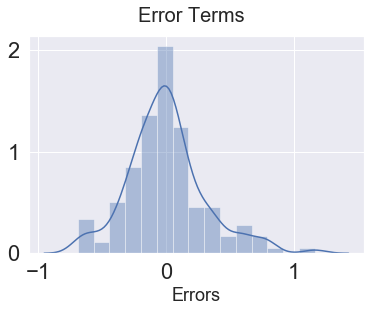

In [278]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_Car_train - y_Car_price), bins = 15)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

## Making Predictions

#### Applying the scaling on the test dataset

In [279]:
df_Car_test[numerical_vars] = scaler.transform(df_Car_test[numerical_vars])

#### Dividing into X_Car_test and y_Car_test

In [280]:
y_Car_test = df_Car_test.pop('price')
X_Car_test = df_Car_test

In [281]:
# Now let's use our model to make predictions.

# Creating X_Car_test_new dataframe by dropping variables from X_Car_test
X_Car_test_new = X_Car_test[X_Car_train_rfe.columns]

# Adding a constant variable 
X_Car_test_new = sm.add_constant(X_Car_test_new)

In [282]:
# Making predictions
y_Car_pred = Car_lm13.predict(X_Car_test_new)

## Model Evaluation

Text(0, 0.5, 'y_Car_pred')

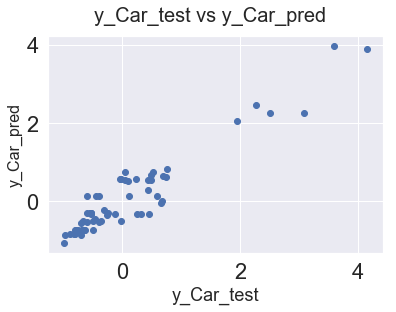

In [283]:
# Plotting y_Car_test and y_Car_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_Car_test,y_Car_pred)
fig.suptitle('y_Car_test vs y_Car_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_Car_test', fontsize=18)                          # X-label
plt.ylabel('y_Car_pred', fontsize=16)    

Text(0, 0.5, 'y_Car_test-y_Car_pred')

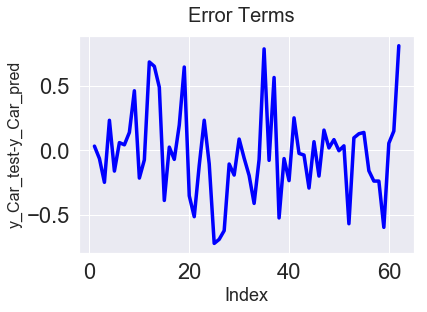

In [284]:
#error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_Car_test-y_Car_pred, color="blue", linewidth=3.5, linestyle="-")     
#plt.scatter(c,y_test-y_pred_m9)
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('y_Car_test-y_Car_pred', fontsize=16) 

Text(0, 0.5, 'y_Car_test-y_Car_pred')

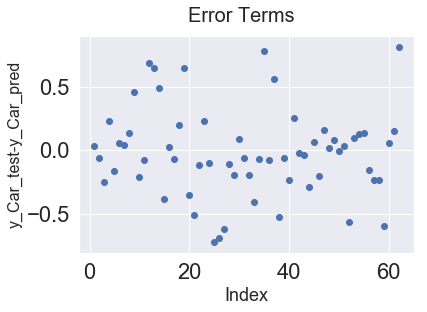

In [285]:
#error terms using scatter plot
c = [i for i in range(1,63,1)]
fig = plt.figure()
#plt.plot(c,y_Car_test-y_Car_pred, color="blue", linewidth=3.5, linestyle="-")     
plt.scatter(c,y_Car_test-y_Car_pred)
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('y_Car_test-y_Car_pred', fontsize=16) 

Text(0, 0.5, 'Car Price')

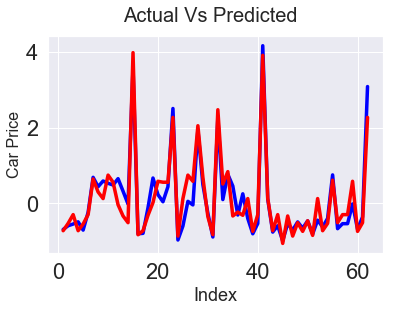

In [286]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_Car_test, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_Car_pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual Vs Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)  

In [287]:
#checking mse and r2
mse=mean_squared_error(y_Car_test, y_Car_pred)
r_squared=r2_score(y_Car_test, y_Car_pred)
print(mse)
print(r_squared)

0.11901658532321086
0.8971382918245375


In [288]:
# calculate MAE, MSE, RMSE
print("Mean Absolute Error : ",metrics.mean_absolute_error(y_Car_test, y_Car_pred))
print("Mean Square Error : ",metrics.mean_squared_error(y_Car_test, y_Car_pred))
print("Root Mean Square Error : ",np.sqrt(metrics.mean_squared_error(y_Car_test, y_Car_pred)))

Mean Absolute Error :  0.2577700781775661
Mean Square Error :  0.11901658532321086
Root Mean Square Error :  0.3449878046007001


### Conclusion

The features that can affect Price are : aspiration, enginesize, CarName_audi, CarName_bmw, CarName_buick, CarName_porsche,    CarName_volvo, cylindernumber_two

We can see that the equation of our best fitted line is:

price=0.72*enginesize+0.66*CarName_audi+1.23*CarName_bmw+0.99*CarName_buick+1.29*CarName_porsche+0.52*CarName_volvo+1.16*cylindernumber_two-0.28*aspiration


As we observed R square and Adjusted R square value we are Getting almost same ie  90.7% and 90.1% respectively, which indicates that none of the parameters in this model are reduntant.

And Error Terms are normally distributed ie,mean centred at 0.

Plese note we are not taken any decision in Outliers. based on the domain we feel that no need to take any action in Outliers. If we take the action in Outliers model accuracy will change.